In [1]:
import os
import seaborn as sns
import copy

In [2]:
# Add current working directory to Python's sys path if not included
imp_mods = os.sys.path
my_pkg = os.getcwd()

if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print('Package imported.')

In [3]:
# import class CensusDataset from a customized module census_methods
from census_methods import CensusDataset as cd

In [4]:
# read-in data from csv file
census_df = sns.categorical.pd.read_csv("Name_and_Gender_cleaned.csv")

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
dtypes: int64(1), object(11)
memory usage: 710.8+ KB


In [6]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow"
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow"
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow"
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow"
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow"


___

### Relationship to Head of House

In [7]:
# check for empty string
cd.check_for_empty_str(census_df)['Relationship to Head of House']

False

No blanks in the Relationship to Head of House column<br><br>

In [8]:
# check for null values
cd.null_checker(census_df)['Relationship to Head of House']

0

No nan value in the Relationship to Head of House column<br><br>

In [9]:
# check out the unique values
print(cd.unique_categs(census_df)['Relationship to Head of House'])

['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Granddaughter', 'Grandson', 'Wife', 'None', 'Partner', 'Neice', 'Sibling', 'Visitor', 'Adopted Daughter', 'Step-Son', 'Cousin', 'Adopted Son', 'Step-Daughter', 'Son-in-law', 'Nephew']


**NOTE:**<br>
'Relationship to Head of House' column does not require any cleaning, as there isn't any empty string, nan, nor inconsistent values in the column.

___

### Occupation

In [10]:
# check for null values
cd.null_checker(census_df)['Occupation']

0

No nan value in the Occupation column<br><br>

In [11]:
# check for empty string
cd.check_for_empty_str(census_df)['Occupation']

False

No blank in the Occupation column<br><br>

In [12]:
# check out the unique values
uniq_occups = cd.unique_categs(census_df)['Occupation']
print(f"There are {len(uniq_occups)} different occupations.\n" +
      f"They include:\n{uniq_occups}")

There are 1099 different occupations.
They include:
['Prison officer', 'Futures trader', 'Student', 'Further education lecturer', 'Production assistant, television', 'Child', 'Retired Risk analyst', 'Retired Orthoptist', 'University Student', "Barrister's clerk", 'Nurse, adult', 'Retired Arts administrator', 'Retired Magazine features editor', 'Retired Customer service manager', 'Pharmacist, community', 'Scientist, water quality', 'Unemployed', 'Consulting civil engineer', 'Actuary', 'Housing manager/officer', 'Counsellor', 'Retired Air traffic controller', 'Television/film/video producer', 'Air traffic controller', 'Insurance account manager', 'Retired Ophthalmologist', 'Immunologist', 'Lecturer, higher education', 'Health promotion specialist', 'Retired Best boy', 'Retired Chemical engineer', 'Copywriter, advertising', 'Charity officer', 'Early years teacher', 'Exhibition designer', 'Sound technician, broadcasting/film/video', 'Energy manager', 'Pilot, airline', 'Merchant navy office

___

### Retired

Using the "Occupation" of each resident, create "Retired" feature with values 0 or 1. Where 1 means retired, and 0 means the not retired.<br>
**NOTE:** A "Retired" column would make it easier and faster to determine the retirement status of each resident

In [13]:
retired = census_df['Occupation'].apply(lambda val: 1 if 'retired' in val.lower() else 0)
retired

0       0
1       0
2       0
3       0
4       0
       ..
7576    0
7577    0
7578    0
7579    0
7580    0
Name: Occupation, Length: 7581, dtype: int64

In [14]:
# check out the distribution of retired occupants
retired_distr = retired.value_counts()
retired_distr

0    6813
1     768
Name: Occupation, dtype: int64

In [15]:
# distribution of retired occupants in percentage
retired_distr_perc = sns.relational.np.round(100 * retired_distr/retired.shape[0], 2)
retired_distr_perc

0    89.87
1    10.13
Name: Occupation, dtype: float64

In [16]:
retired_distr.array

<PandasArray>
[6813, 768]
Length: 2, dtype: int64

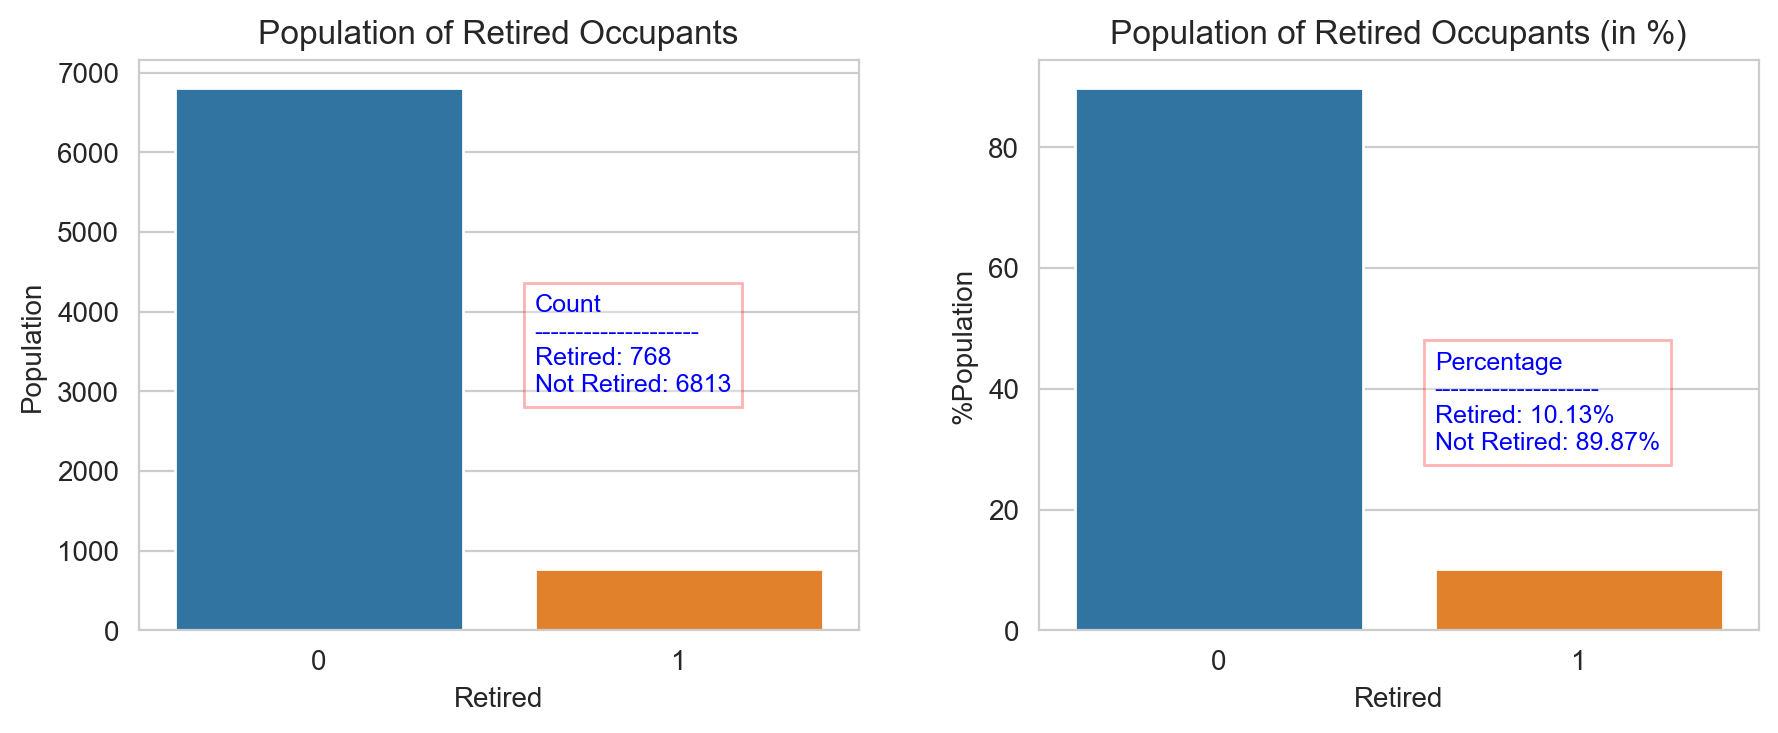

In [17]:
sns.set_style(style='whitegrid')
retired_population_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = retired_population_fig.add_axes([0, 0, .6, .95]), retired_population_fig.add_axes([0.75, 0, .6, .95])

freq = sns.barplot(x=retired_distr.index, y=retired_distr, ax=l)
perc = sns.barplot(x=retired_distr_perc.index, y=retired_distr_perc, ax=r)

freq.set_ylabel('Population'), freq.set_xlabel('Retired')
perc.set_ylabel('%Population'), perc.set_xlabel('Retired')

freq.set_title("Population of Retired Occupants")
perc.set_title("Population of Retired Occupants (in %)")

freq.text(0.6, 3000, "Count\n" +
          "-"*20 + "\n" +
          f"Retired: {retired_distr.loc[1]}" + "\n" +
         f"Not Retired: {retired_distr.loc[0]}",
         bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3},
         fontsize=9, color='blue')

perc.text(0.6, 30, "Percentage\n" +
          "-"*20 + "\n" +
          f"Retired: {retired_distr_perc.loc[1]}%" + "\n" +
         f"Not Retired: {retired_distr_perc.loc[0]}%",
         bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3},
         fontsize=9, color='blue')

sns.categorical.plt.show()

#### Make the "retired" series a new column in the census_df

In [18]:
census_df['Retired'] = retired

___

### Is Student

Using the "Occupation" of each resident, create "Is Student" feature with values 0 or 1. Where 1 means is a student, and 0 means the is not a student.<br>
**NOTE:** "Is Student" column would make it easier and faster to determine if each resident is a student

In [19]:
students = census_df['Occupation'].apply(lambda val: 1 if "student" in val.lower() else 0)
students

0       0
1       0
2       1
3       1
4       0
       ..
7576    0
7577    1
7578    1
7579    1
7580    0
Name: Occupation, Length: 7581, dtype: int64

In [20]:
# check out the distribution of students occupants
students_distr = students.value_counts()
students_distr

0    5694
1    1887
Name: Occupation, dtype: int64

In [21]:
# distribution of students occupants in percentage
students_distr_perc = sns.relational.np.round(100 * students_distr/students.shape[0], 2)
students_distr_perc

0    75.11
1    24.89
Name: Occupation, dtype: float64

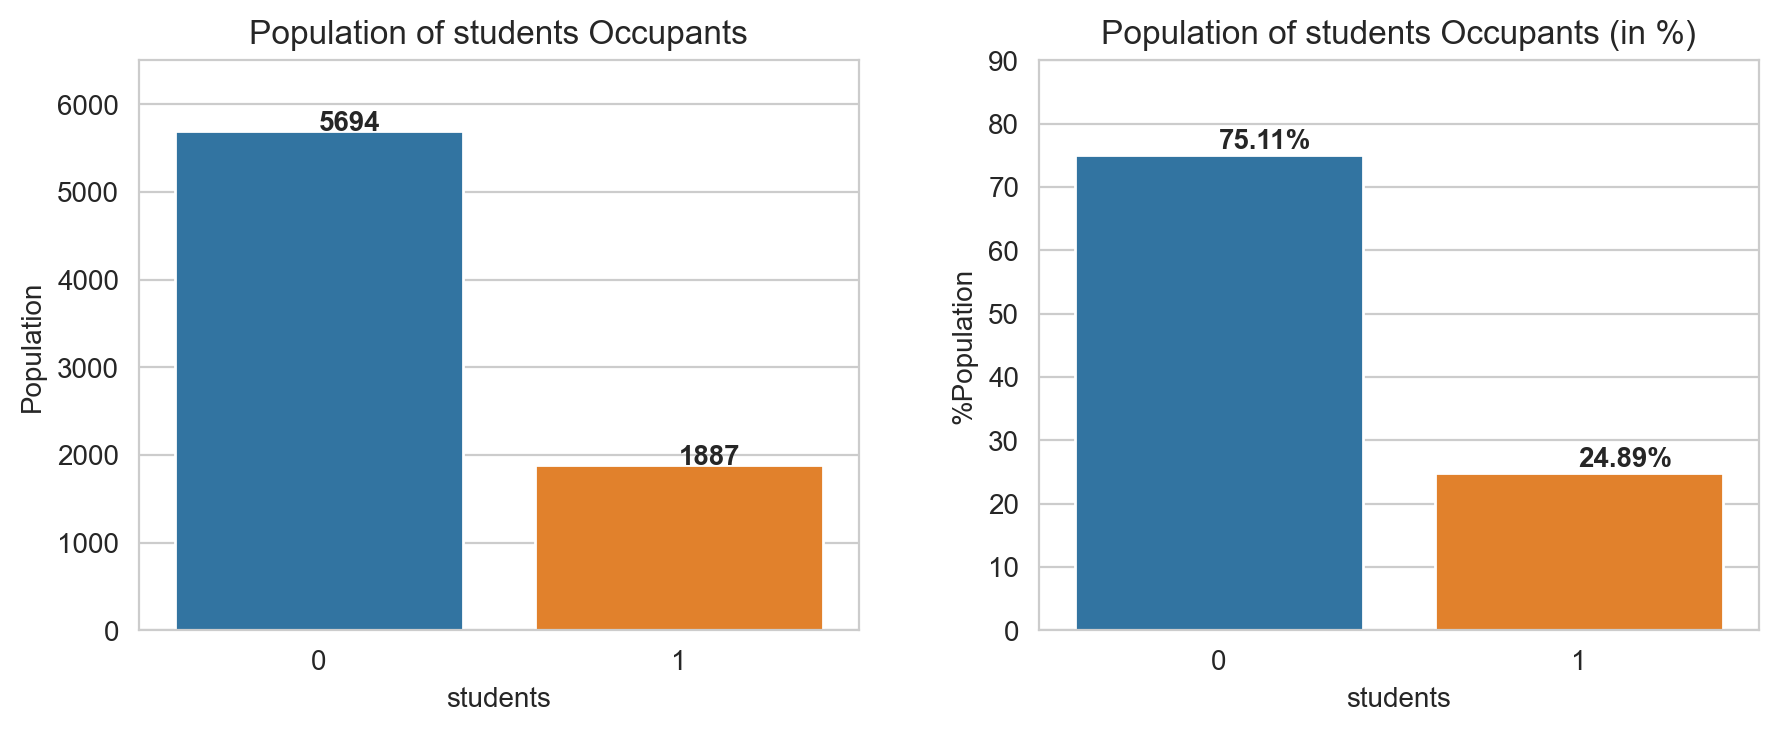

In [22]:
students_population_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = students_population_fig.add_axes([0, 0, .6, .95]), students_population_fig.add_axes([0.75, 0, .6, .95])

freq = sns.barplot(x=students_distr.index, y=students_distr, ax=l)
perc = sns.barplot(x=students_distr_perc.index, y=students_distr_perc, ax=r)

freq.set_ylabel('Population'), freq.set_xlabel('students')
perc.set_ylabel('%Population'), perc.set_xlabel('students')

freq.set_title("Population of students Occupants")
perc.set_title("Population of students Occupants (in %)")

for i in range(len(students_distr.index)):
    freq.text(i, students_distr[i]+1, f"{students_distr[i]}", weight='bold')
    perc.text(i, students_distr_perc[i]+1, f"{students_distr_perc[i]}%", weight='bold')
    
freq.set_ylim(0, 6500)
perc.set_ylim(0, 90)

sns.categorical.plt.show()

In [23]:
census_df['Is Student'] = students

In [24]:
fname = 'students_population_figure.png'
cd.fig_writer(fname, students_population_fig)

'students_population_figure.png'

___

### Employed

Using the "Occupation" of each resident, create "Employed" feature with values 0 or 1. Where 1 means employed, and 0 means  unemployed or is a child.<br>
**NOTE:** An "Employed" column would make it easier and faster to determine the employment status of each resident

In [25]:
employed = census_df['Occupation'].apply(lambda val: 0 if (val.lower() in ['unemployed', 'child'])
                                         or (val.lower().find('student') != -1) else 1)
employed

0       1
1       1
2       0
3       0
4       1
       ..
7576    0
7577    0
7578    0
7579    0
7580    0
Name: Occupation, Length: 7581, dtype: int64

In [26]:
# check out the distribution of employed occupants
employed_distr = employed.value_counts()
employed_distr

1    4765
0    2816
Name: Occupation, dtype: int64

In [27]:
# distribution of employed occupants in percentage
employed_distr_perc = sns.relational.np.round(100 * employed_distr/employed.shape[0], 2)
employed_distr_perc

1    62.85
0    37.15
Name: Occupation, dtype: float64

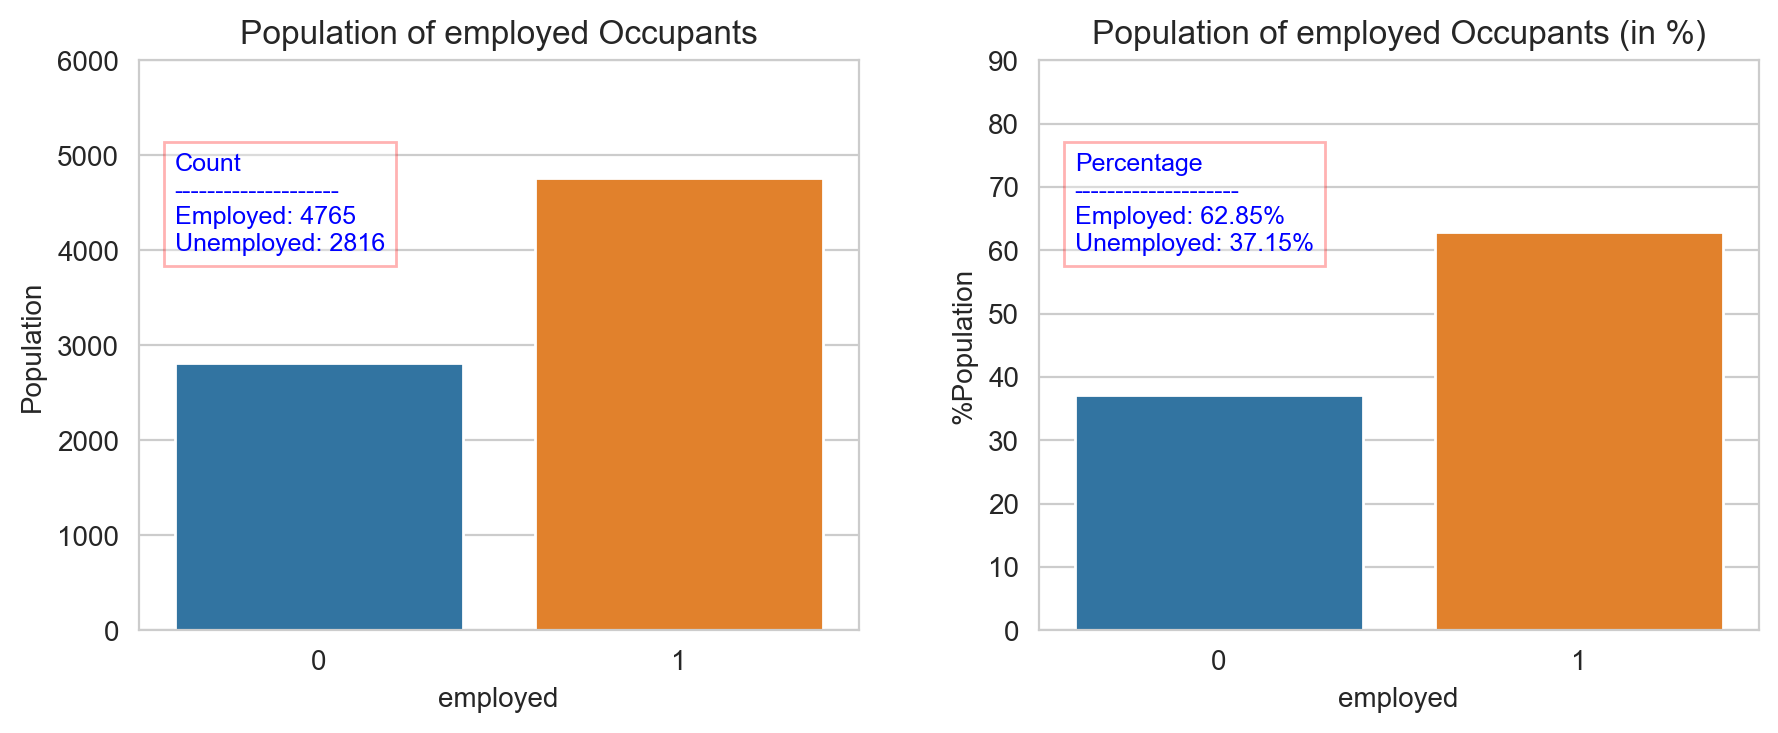

In [28]:
employed_population_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = employed_population_fig.add_axes([0, 0, .6, .95]), employed_population_fig.add_axes([0.75, 0, .6, .95])

freq = sns.barplot(x=employed_distr.index, y=employed_distr, ax=l)
perc = sns.barplot(x=employed_distr_perc.index, y=employed_distr_perc, ax=r)

freq.set_ylabel('Population'), freq.set_xlabel('employed')
perc.set_ylabel('%Population'), perc.set_xlabel('employed')

freq.set_title("Population of employed Occupants")
perc.set_title("Population of employed Occupants (in %)")

freq.text(-0.4, 4000, "Count\n" +
          "-"*20 + "\n" +
          f"Employed: {employed_distr.loc[1]}" + "\n" +
         f"Unemployed: {employed_distr.loc[0]}",
         bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3},
         fontsize=9, color='blue')

perc.text(-0.4, 60, "Percentage\n" +
          "-"*20 + "\n" +
          f"Employed: {employed_distr_perc.loc[1]}%" + "\n" +
         f"Unemployed: {employed_distr_perc.loc[0]}%",
         bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3},
         fontsize=9, color='blue')

freq.set_ylim(0, 6000)
perc.set_ylim(0, 90)
sns.categorical.plt.show()

#### Save figure to filesystem as PDF file

In [29]:
fname = 'employed_population_figure.png'
cd.fig_writer(fname, employed_population_fig)

'employed_population_figure.png'

#### Make the "employed" series a new column in the census_df

In [30]:
census_df['Employed'] = employed

In [31]:
census_df = census_df[['House Number', 'Street', 'First Name', 'Surname', 
                       'Age', 'Relationship to Head of House', 'Marital Status', 'Gender', 
                       'Occupation', 'Infirmity', 'Religion', 'Address',
                       'Retired', 'Employed', 'Is Student']]

In [32]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Retired                        7581 non-null   int64 
 13  Emp

In [33]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Retired,Employed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,1,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,1,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,1,0


___

#### Save dataframe changes to filesystem as csv file

In [34]:
fname = "Occupation_and_Rel_to_HH_cleaned.csv"
census_df.to_csv(fname, index=False)

___

**<center> THE END</center>**

___